<h2>SNA of Bollywood Films - Phase 1: The Dataset and Statistical Overview</h2>

Think of 6 Degrees of Kevin Bacon -- only this time, it's a social network analysis (SNA) of the actors and directors of Bollywood films from for the 50 years from 1970-2018 (the modern era). This project is a reincarnation and expansion of an earlier project that was part of a tutorial and workshop on social network analysis (SNA) that I conducted at HICSS-47 (2014). That tutorial looked at social networks in Bollywood movies for all the Bollywood films from 2008-2013. The slides from that earlier tutorial are provided here for reference. This current rendition expands the sample from 6 years of films to the 49 years of films from 1970 to 2018.

The genesis of my initial work, as well as this expansion, is found not only in the simple games, applications, and research revolving around the "Six Degrees of Kevin Bacon" (based on Hollywood films), but also the larger body of SNA including the concepts of degrees of separation, clustering, and small world networks:

<ul>
<li><a href="https://en.wikipedia.org/wiki/Six_Degrees_of_Kevin_Bacon">Six Degrees of Kevin Bacon</a></li>
<li><a href="https://oracleofbacon.org/center.php">The Center of the Hollywood Universe</a></li>
<li><a href="https://en.wikipedia.org/wiki/Small-world_network">Small-world Networks</a></li>
</ul>

The project involves three intertwined phases. The first phase focuses on the creation of the data set on which the SNA analysis is based along with a brief statistical overview of the data set. The second phase is devoted to a SNA of this dataset -- looking primarily at who works with whom and who the key players are from a SNA perspective. Finally, the third phase combines this data with another data set based on 'Hindi Film Families' in order to look at the participation and influence of these families in Bollywood films. The analysis in all 3 phases is housed in 3 separate Jupyter iPython notebooks.

<ol>
    <li>SNA of Bollywood Films - Phase 1: The Dataset and Statistical Overview</li>
    <li>SNA of Bollywood Films - Phase 2: Participation and Influence of Directors and Actors</li>
    <li>SNA of Bollywood Films - Phase 3: The Role of Film Families in Bollywood</li>
</ol>

<h3><a class="anchor" id="toc">Table of Contents</a></h3>

1. [Introduction](#intro)<br>
2. [Constructing the Data Set](#dataset)<br>
3. [Transforming the data set into a Dataframe](#dataframe)<br>
4. [Getting the Lay of the Land: Structure and Contents of the Dataframe](#lay_land)<br>


In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

<h3>Constructing the Data Set</h3>

The foundation for the data set comes from a wikipedia page indexing the <a href="https://en.wikipedia.org/wiki/Lists_of_Bollywood_films">Lists of Bollywood Films</a> for the years from 1940 to 2018. For the moment, I'm leaving the earlier years from 1940-1969 for future analysis, primarily because it is extremely labor intensive working with the wide variety of data formats, missing data, and errors found in even smaller subsets of the films in these lists. \[Note: the IMDB data sets provide info about Bollywood films and actors, but it is not as comprehensive as the lists provided in Wikipedia.]

Each entry in the <i>Lists</i> designates a link to a wikipedia page devoted to the Bollywood films for a single year. The structure of all the links is simple (e.g. the link for 2018 is wikipedia.org/wiki/List_of_Bollywood_films_of_2018). This makes it straightforward to write a program to download each of the 50 pages in this sample, which is what I did -- see the Python (3.+) program in this repository labeled <a href='https://github.com/daveking63/Six-Degrees-of-Bollywood/blob/master/retrieveListofBollywoodFilmsbyYear.py'><i>retrieveListofBollywoodFilmsbyYear.py</i></a>. Once the pages were downloaded, they were each stored in a local (HTML) file for further analysis.

Each of the downloaded webpages contains an HTML table of information about each of the films produced with in a given year. While the structure and content of the pages and tables varied from one decade, and often one year, to the next, all of the tables provided information about the following for each film:

<ul>
  <li>year of release</li>
  <li>title</li>
  <li>HTML link to a wikipedia page devoted to that title</li>
  <li>director(s) (one or more)</li>
  <li>cast (i.e. list of actors names in the film)</li>
  <li>genre(s) (one or more tags denoting the type of movie, e.g. Romance, Drama, Comedy, etc.)</li>
</ul>

Again, a program -- <a href='https://github.com/daveking63/Six-Degrees-of-Bollywood/blob/master/bollySetUp-HTMLLists.py'><i>bollySetUp-HTMLLists.py</i></a> -- was used to extract the rows from each of the 50 tables and to create a single, consolidated table for all of the films from all of the years. A quick look at this Python 3 program will reveal that it employs a small set of functions based on Beautiful Soup package along with a number of simple text and regular expression "re" function calls. In the program, the title and it's associated page link are defined as strings, while the director, cast and genre variables are all Python lists because they contain 0 or more entries.  At the moment, the results are stored row-by-row in an Excel file whose name is <a href='https://github.com/daveking63/Six-Degrees-of-Bollywood/blob/master/bollywoodData.xlsx'><i>bollywoodData.xlsx</i></a>).

<h3>Transforming the data set into a Dataframe</h3>

Given that the data is in an .xlsx file, one of the first steps I've taken in producing a statistical overview of the data is to read the file with a pandas 'read_excel' method or function which transforms it into a pandas 'dataframe'.

Note: While I could have read the file and transformed it into a variety of formats, I selected pandas primarily because of it's analytical capabilities (for a summary of these, see <a href="https://github.com/daveking63/Jupyter-iPython-Notebooks"> <i>Pandas Notes</i></a> - a Python notebook provided in one of my other repositories).

In [3]:
import numpy as np
import pandas as pd
import matplotlib as plt

# read bollywoodData.xlsx transforming it to a pandas dataframe
bollywoodPath = "c:/Research/Bollywood/"
bollywoodXLFile = bollywoodPath + "bollywoodData.xlsx"
bollywoodDF = pd.read_excel(bollywoodXLFile, sheet_name="bollywoodData")
print('Type of bollywoodDF:',type(bollywoodDF))


Type of bollywoodDF: <class 'pandas.core.frame.DataFrame'>


  Given the 'bollywoodDF' dataframe, we should get a sense of its structure (size, shape, column names and types, and its row index) and the contents of it's cells. 

In [4]:
# Dimensional Structure

print("1. Number of dimensions: bollywoodDF.ndim", bollywoodDF.ndim)
print()
print("2. Number of elements in each dimension: bollywoodDF.shape", bollywoodDF.shape)
print("")
print("3. Range of row numbers: bollywoodDF.index:")
print("")
print(bollywoodDF.index)
print("")
print("4. Names of columns: bollywoodDF.columns:")
print("")
print(bollywoodDF.columns)
print("")
print("5. Size -- number of elements (rows x columns): bollywoodDF.size", bollywoodDF.size)
print("")
print("6. Info about row index and column names and types and : bollywoodDF.info()")
print("")
print(bollywoodDF.info())

1. Number of dimensions: bollywoodDF.ndim 2

2. Number of elements in each dimension: bollywoodDF.shape (4908, 9)

3. Range of row numbers: bollywoodDF.index:

RangeIndex(start=0, stop=4908, step=1)

4. Names of columns: bollywoodDF.columns:

Index(['_id', 'movieID', 'movieTitle', 'movieYear', 'movieLink',
       'movieDirector', 'movieCast', 'movieGenre', 'count'],
      dtype='object')

5. Size -- number of elements (rows x columns): bollywoodDF.size 44172

6. Info about row index and column names and types and : bollywoodDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4908 entries, 0 to 4907
Data columns (total 9 columns):
_id              4908 non-null int64
movieID          4908 non-null object
movieTitle       4908 non-null object
movieYear        4908 non-null int64
movieLink        4154 non-null object
movieDirector    4083 non-null object
movieCast        4540 non-null object
movieGenre       3572 non-null object
count            4908 non-null int64
dtypes: int64(

Based on this information, it's easy to see that it's a two dimensional dataframe (rows x columns). There are 4908 rows and 9 columns in the dataframe.  The row index indicates that they are numbered from 0 to 4907. The 9 column names were taken from the header row in the Excel table and include:

    _id, movieID, movieTitle, movieYear, movieLink, 
    movieDirector, movieCast, movieGenre, and count
    
The combination of 4908 rows and 9 columns results in 44172 cells.

In addition to the column names, the 'dataframe.info()' method or function also provides details about the column types. As it shows, there were 3 columns containing integers and 6 columns containing 'objects' which in this case is 'strings'. The 'info' method also provides the number of non-null cells by column. So, for instance, while there are 4908 cells in each column, in the 'movieLink' column only 4154 of them have non-null values. The other 754 cells had 'null' or missing values.

While the column names and types provide some hints about the contents of the cells in a particular column, the only way to really understand the contents is to look a few rows in the dataframe.  You can easily do this with the 'head' and 'tail' methods or functions.  The 'head' method displays rows at the top, while the 'tail' displays rows at the bottom.  By default 5 rows are displayed, but you designate more rows or less. For instance head(10) would display 10 rows.

In [5]:
print("First 5 rows of the dataframe: bollyWoodDF.head()")
bollywoodDF.head()

First 5 rows of the dataframe: bollyWoodDF.head()


,_id,movieID,movieTitle,movieYear,movieLink,movieDirector,movieCast,movieGenre,count
0,0,1970-0,Aag Aur Daag,1970,/wiki/Aag_Aur_Daag,A. Salaam,Joy Mukherjee|Madan Puri,Action,1
1,1,1970-1,Aan Milo Sajna,1970,/wiki/Aan_Milo_Sajna,Mukul Dutt,Asha Parekh|Rajesh Khanna|Vinod Khanna,Drama,1
2,2,1970-2,Aansoo Aur Muskan,1970,/wiki/Aansoo_Aur_Muskan,P. Madhavan,Bindu|Padmini,Drama,1
3,3,1970-3,Abhinetri,1970,/wiki/Abhinetri,Subodh Mukherjee,Shashi Kapoor|Hema Malini|Deb Mukherjee,Drama,1
4,4,1970-4,Bachpan,1970,/wiki/Bachpan,Kotayya Pratyagatma,Sanjeev Kumar|Tanuja,Drama,1


In [6]:
print("Last 5 rows of the dataframe: bollywoodDF.tail()")
bollywoodDF.tail()

Last 5 rows of the dataframe: bollywoodDF.tail()


,_id,movieID,movieTitle,movieYear,movieLink,movieDirector,movieCast,movieGenre,count
4903,4903,2018-116,Mangal Ho,2018,/wiki/Mangal_Ho,Pritish Chakraborty,Pritish Chakraborty|Aanushka Ramesh|Sanjay Mis...,SciFi|Comedy,1
4904,4904,2018-117,The Accidental Prime Minister (film),2018,/wiki/The_Accidental_Prime_Minister_(film),Vijay Ratnakar Gutte,Anupam Kher|Akshaye Khanna,Biopic,1
4905,4905,2018-118,Amavas,2018,/wiki/Amavas,Vijay Ratnakar Gutte,Anupam Kher|Akshaye Khanna,Biopic,1
4906,4906,2018-119,Zero (2018 film),2018,/wiki/Zero_(2018_film),Aanand L. Rai,Shah Rukh Khan|Katrina Kaif|Anushka Sharma|Tig...,Comedy|Drama,1
4907,4907,2018-120,Simmba,2018,/wiki/Simmba,Rohit Shetty,Ranveer Singh|Sara Ali Khan|Sonu Sood,Action|Comedy,1


With one exception (missing values), the 'heads's and 'tail's methods provide a pretty good understanding of the types of data in the various columns and cells:

<ol>
    <li>_id -- this is a numerical 'id' used to indicate the ordered position of the row (i.e. movie) in the dataframe. Because it is unique, it can be used by other programs as a 'hashed' index. My choice of this particular label ('\_id') was purposeful because this is the label that the 'document-database' MongoDB searches for when it tries to construct an index for a 'collection' of documents (see the notebook <a href="https://github.com/daveking63/Jupyter-iPython-Notebooks/blob/master/SemiStructuredData_PythonDicts_JSON_MongoDB_PyMongo.ipynb">Working with Semi-Structured Data: Python Dictionaries, JSON, MongoDB and PyMongo</a> in another of my repositories).</li>
    <li>movieID -- string indicating the position of the movie within a given year. Number starts at 0. For example, as shown the first movie (chronologically) in 1970 is 1970-0, the second 1970-1, etc.</li>
    <li>movieTitle -- title of the movie</li>
    <li>movieYear -- number representing the year released</li>
    <li>movieLink -- sting representing a link (usually) to wikipedia web page (complete link is prefaced by http://wikipedia/...)</li>
    <li>movieDirector -- string containing list of director names separated by a pipe '|' </li>
    <li>movieCast -- string containing list of 'starring' cast member names separated by a pipe '|'. This list is usually only a small segment of the complete cast list. Creating a complete cast list would require downloading the associated 'movieLink' page and scraping the html for the complete list, something I'll leave for another day.</li>
    <li>movieGenre -- string containing list of genre names separated by a pipe '|'. As Wikipedia notes, "A film genre is a motion-picture category based  on similarities either in the narrative elements or in the emotional response to the film"</li>
    <li>count -- used programmatically as a quick way to compute total counts (often in other applications)</li>
</ol>

The pipe symbol '|', or some other unique symbol (e.g. double colons '::'), is often used to create a string representing a  concatenated list of entities. In this way, variables or fields whose values are lists of entities can be entered and stored in a table or spreadsheet (just like they were in the bollywoodData.xlsx spreadsheet). Of course, if a concatenated string of this sort is stored in a spreadsheet, then they'll have to be split programmatically before they can be used in virtually any kind of analysis. This is why, other formats and data structures (e.g. Python dictionaries) are preferable. However, for the time being I'm going to ignore other options and stick with the current dataframe.

<h3>Statistical Overview</h3>

In it's current form (with the 'piped' strings) there's not much to statistically summarize except the movie count by years.

<h5> Number of Movies  by Year</h5>

There are a variety of ways to determine how frequently particular values occur in a column. One straightforward method is pandas 'value_counts'. This is what I've done with the 'movieYear' column. I've also sorted the results by year with the 'sort_index' method. Left unsorted, the order of the years will be unpredictable.

Looking at the 'line' plot of the counts, it's obvious that over the 49 year time period from 1970 to the present there's been substantial variability in the number of movies released per year. The mean number of releases for the 49 year period was 100 movies per year with a standard deviation around 22 movies per year. The number of releases was at its lowest (49 movies) in 1986 and its highest (141 movies) in 2014. Within this variability, at least 3 patterns are descernible: (1) the number appears to seesaw back and forth every year or so; (2) there's an inflection point somewhere between 1995 and 2005; and (3) from 2005 to the present the mean number of movies released per year has increased (although not shown, it has gone from 95 movies per year before 2005 and 112 movies from 2005 on). Both the bottom point in the mid-80s to late-80s and the inflection point in the latter part of the 90s and early 2000s are well documented:

>In the late 1980s, Hindi cinema experienced another period of stagnation, with a decline in box office turnout, due to increasing violence, decline in musical melodic quality, and rise in video piracy, leading to middle-class family audiences abandoning theaters...

>The 2000s saw a growth in Bollywood's recognition across the world due to a growing and prospering NRI and Desi communities overseas. A fast growth in the Indian economy and a demand for quality entertainment in this era, led the nation's film-making to new heights in terms of production values, cinematography and innovative story lines as well as technical advances in areas such as special effects and animation.

In [7]:
numberOfMoviesByYear = bollywoodDF.movieYear.value_counts().sort_index()
print("mean number of movies per year - 1970-2004:", numberOfMoviesByYear[0:35].mean())
print("mean number of movies per year - 1970-2004:", numberOfMoviesByYear[35:49].mean())
print("")
print("Top 3 and Bottom 3 counts")

numberOfMoviesByYear.head(3)
numberOfMoviesByYear.tail(3)
print("Statistical description of movieYear counts:")
numberOfMoviesByYear.describe()

numberOfMoviesByYear.plot(kind='line', title='Number of Movies by Year:')

mean number of movies per year - 1970-2004: 95.17142857142858
mean number of movies per year - 1970-2004: 112.64285714285714

Top 3 and Bottom 3 counts


1970    69
1971    85
1972    95
Name: movieYear, dtype: int64

2016    121
2017    120
2018    121
Name: movieYear, dtype: int64

Statistical description of movieYear counts:


count     49.000000
mean     100.163265
std       21.734522
min       39.000000
25%       85.000000
50%      102.000000
75%      116.000000
max      141.000000
Name: movieYear, dtype: float64

<h5>Number of Directors, Cast and Genre per Year</h5>

Handling Strings with Pipe Symbols: Findall and Split

In order to summarize the trends in the number of directors, cast members and genre by year or any other factor, we need to convert the 'piped' strings either into a count or into individual elements that can be counted. If all we want to do is count the number of individual elements in the string, then we could use something like the 'findall' method found in the regular expressions ('re') library. Take, for instance, the cast represented by the string 'Parekh|Rajesh Khanna|Vinod Khanna'. If we apply the 're.findall' method to the string (see below), it will indicate that there are 2 'pipe' symbols in the string to which we can add a '1' to get the number of cast members which is '3'. If, however, we want to capture the individual elements for further analysis, then we could 'split' the string into its individual elements and save the elements for later use. Then all we have to do is 'count' the saved elements to arrive at the numbers we want. This is also demonstrated below.

In [8]:
import re

print("Using 're.findall' to count cast members:")
print("")
for i in range(3):
    castStr = bollywoodDF.loc[i,'movieCast']
    castCnt = len(re.findall(r"\|",castStr)) + 1
    print("Original string:", castStr, " -- number in cast:", castCnt)
print("")

print("Using '.split' to create cast list:")
print("")
for i in range(3):
    cast = bollywoodDF.loc[i,'movieCast']
    castList = cast.split('|')
    castCnt = len(castList)
    print("Split into castList:", castList," -- number in cast:", castCnt)

Using 're.findall' to count cast members:

Original string: Joy Mukherjee|Madan Puri  -- number in cast: 2
Original string: Asha Parekh|Rajesh Khanna|Vinod Khanna  -- number in cast: 3
Original string: Bindu|Padmini  -- number in cast: 2

Using '.split' to create cast list:

Split into castList: ['Joy Mukherjee', 'Madan Puri']  -- number in cast: 2
Split into castList: ['Asha Parekh', 'Rajesh Khanna', 'Vinod Khanna']  -- number in cast: 3
Split into castList: ['Bindu', 'Padmini']  -- number in cast: 2


Using Findall to Analyze Director, Cast and Genre Counts

For the time being let's use the 'findall' method. I going to calculate the counts for movieDirectors, movieCast, and movieGenre. Once calculated, I'm going to add them to the bollywoodDF. Before, I do this however, I need to talk about missing values. In the original spreadsheet, missing values were denoted by 'NA.' When the spreadsheet was transformed into a dataframe, these missing values were converted to 'nan' (a special 'float' value) used in the pandas package to denote 'missing'. When you try to 'split' or 'find' a particular character (like the '|') in a float instead of a string, an error occurs. The moral of the story is, before you 'split' or apply 'findall' to a cell value, check to see if it's a float. If it's not, then go ahead. If it is, set it to missing and proceed. This is what I've done below.

In [9]:
# Finding number of entities in a concatenated strings
# joined by pipe '|' symbol for fields in dataframe.
# For each movie and column of focus, append the number
# to a list


def convertYrToYrs5(entDF,entCol):
    start = 0
    end = entDF.shape[0]
    entList = []
    for i in range(start, end):
        entity = bollywoodDF.loc[i,entCol]
        if type(entity) != float:
            entityCnt = len(re.findall(r"\|",entity)) + 1
        else:
            entityCnt = entity
        entList.append(entityCnt)
    numSeries = pd.Series(entList)
    return numSeries

directors = convertYrToYrs5(bollywoodDF,'movieDirector')
bollywoodDF['numDirectors'] = directors.values
directors = convertYrToYrs5(bollywoodDF,'movieCast')
bollywoodDF['numCast'] = directors.values
directors = convertYrToYrs5(bollywoodDF,'movieGenre')
bollywoodDF['numGenre'] = directors.values

print('Expanded dataframe rows and columns:', bollywoodDF.shape)
print("")
print("Expanded column names:")
print("")
print(bollywoodDF.columns)
print("")
print("Missing count and types:")
print("")
bollywoodDF.info()

Expanded dataframe rows and columns: (4908, 12)

Expanded column names:

Index(['_id', 'movieID', 'movieTitle', 'movieYear', 'movieLink',
       'movieDirector', 'movieCast', 'movieGenre', 'count', 'numDirectors',
       'numCast', 'numGenre'],
      dtype='object')

Missing count and types:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4908 entries, 0 to 4907
Data columns (total 12 columns):
_id              4908 non-null int64
movieID          4908 non-null object
movieTitle       4908 non-null object
movieYear        4908 non-null int64
movieLink        4154 non-null object
movieDirector    4083 non-null object
movieCast        4540 non-null object
movieGenre       3572 non-null object
count            4908 non-null int64
numDirectors     4083 non-null float64
numCast          4540 non-null float64
numGenre         3572 non-null float64
dtypes: float64(3), int64(3), object(6)
memory usage: 460.2+ KB


With the count columns in hand, we can use the 'describe' method to statistically summarize these numerical columns. By default, this method actually produces a dataframe whose columns are the numerical columns in the dataframe being analyzed and whose rows are the statistics (including mean, std, min, the first three quartiles of the distribution, and the max). Since it's the columns that are of major interest, I've transposed the columns and rows. Additionally, I've assigned this new dataframe to a variable called 'describeBollywood'. In this way, I can use it in further analysis (which is what I've done below in calculating the number and % of missing values).

In [10]:
describeBollywood = bollywoodDF[['numDirectors','numCast','numGenre']].describe().transpose()
describeBollywood['Missing'] = 4907 - describeBollywood['count']
describeBollywood['%Missing'] = round(describeBollywood['Missing']/4908 * 100,2)
describeBollywood

,count,mean,std,min,25%,50%,75%,max,Missing,%Missing
numDirectors,4083.0,1.005878,0.076452,1.0,1.0,1.0,1.0,2.0,824.0,16.79
numCast,4540.0,3.482819,1.717403,1.0,3.0,3.0,4.0,18.0,367.0,7.48
numGenre,3572.0,1.460246,0.801384,1.0,1.0,1.0,2.0,8.0,1335.0,27.20


Focusing on the number of directors, cast members and genres, here are some of the patterns we can observe from the above statistics:

<ul>
    <li><i>Number of Directors per movie</i>: Regardless of the country, films have always had one director and it's the case here (the mean and all the quartiles are all 1.0). The oddity is a film with two directors of which there were 24 out 4083 films (or 0.6%), a number produced by the formula bollywoodDF['numDirectors'].value_counts(). In this case it's unlikely that this pattern would have changed even if there were no missing values. </li>
    <li><i>Number of Cast members per movie</i>: On the 'average' the number of reported starring cast members per movie was around 3.0-3.5 although there was a fair bit of variability. More specifically, the mean number was 3.5 with a standard deviation of 1.7, while the 1st and 2nd quartiles were 3.0 and the 3rd quartile was 4.0. Additionally, the max number of cast members in a movie was 18. Given that 7% of the movies had no cast members listed, there's a good chance the variability would have been larger if there had been fewer missing numbers.</li>
    <li><i>Number of Genres per movie</i>: The average number of genres used to characterize a movie is somewhere between 1 and 2. Again, the mean was close to 1.5 with a standard deviation of .8, while the lst and 2nd quartiles where 1.0 and the 3rd quartile was 2.0. The max was 8 -- which is pretty useless from a consumer's standpoint. Given that close to 30% of the movies had no genres assigned, there is again a good chance that the genre patterns might have changed with this additional information.</li>
</ul>
This info is a bit dry. More interesting patterns start to arise when we look at changes in these counts overtime and drill into the specific values -- that is, which directors, cast members and genres dominate the Bollywood landscape and how have these names and labels changed overtime.   

<h4>Longitudinal Analysis</h4>

To get a sense of how the various counts have shifted over the last 49 years, we need to group the results by year (or some interval of time). To do this we can use the dataframe 'groupby' method to compute the number of movies for each the 49 years. Once this is done we can plot the change in the number of movies overtime, as well as compute associated summary statistics.

To group the data by a selected variable we need to specify the:

<ol>
    <li>columns of interest in a list -- ['numDirectors','numCast','numGenre']</li>
    <li>column to 'groupby' -- 'movieYear'</li>
    <li>statistic (method) to compute -- mean()</li>
</ol> 


***Plot of the Mean Number of Directors, Cast Members, and Genre Per Movie Per Year


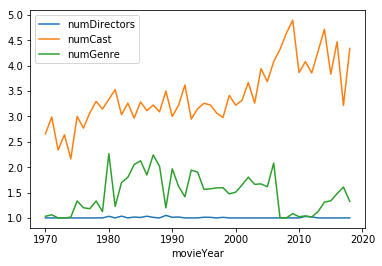

***Summary groupby statistics for Number of Directors, Cast Members, and Genre Per Movie Per Year


,numDirectors,numCast,numGenre
count,49.000000,49.000000,49.000000
mean,1.006161,3.427953,1.484427
std,0.011729,0.600855,0.375503
min,1.000000,2.164706,1.000000
25%,1.000000,3.067568,1.125000
50%,1.000000,3.260870,1.479339
75%,1.010526,3.831858,1.697674
max,1.050000,4.894737,2.265625


In [11]:
meanNumOverTime = bollywoodDF.groupby('movieYear')['numDirectors','numCast','numGenre'].mean()
#

print("")
print("***Plot of the Mean Number of Directors, Cast Members, and Genre Per Movie Per Year")

import matplotlib.pyplot as plt
meanNumOverTime.plot.line()
plt.show()

print('***Summary groupby statistics for Number of Directors, Cast Members, and Genre Per Movie Per Year')
meanNumOverTime.describe()

When averaged over the years:
<ol>
    <li>Regardless of the year, the mean number of directors per movie is 1. This is the case regardless of whose movie industry we're talking about.</li>
    <li>While there has been substantial variability in the mean number of starring cast members per movie, the number has been systematically rising over time.</li>
    <li>The mean number of genre used to describe a movie jumps around between 1 and 2 in a seemingly random fashion.
</ol>

<h4>Most Active Directors, Starring Cast Members, and Genre</h4>

While these figures are mildly interesting what's more intriguing is how the actual names and labels have faded in and out over time (regardless of how many there were). That's what we'll consider next.

To move to the next step in the analysis and to support the SNA in Phases 2 and 3, we need to consider the individual entities in the strings we've been working with so far in this Phase, over and above simply counting the entities within the strings. In order to do this, we need a different data structure.

Creating a Python Dictionary for Bollywood Data

Having conducted a number of similar analyses, the structure that comes immediately to mind is a Python dictionary. The are any number of sources that explain the details behind dictionaries including a recent <a href="https://github.com/daveking63/Jupyter-iPython-Notebooks/blob/master/SemiStructuredData_PythonDicts_JSON_MongoDB_PyMongo.ipynb">notebook I put together on using dictionaries for analyzing semi-structured data</a>. Succinctly put, a python <i>dictionary</i> (denoted 'dict') is  a 'mutable' collection of 'key:value' pairs separated by colons where the 'key's are immutable data types (integers, strings or tuples) that are unique with the dictionary and the values are mutuable and can be of virtually any data type including another dictionary. The pairs within the collection are separated by commas and encased in 'curly' braces '{}'. For example, the representation for the last row in our bollywoodDF dataframe might be:

    {4907:{'_id':4907, 'movieID':'2018-120', 'movieTitle':'Simmba', 'movieYear':2018, 
          'movieDirector': ['Rohit Shetty'], 'movieCast':['Singh', 'Sara Ali Khan', 'Sonu Sood'],
          'movieGenre':['Action','Comedy'], 'count':1, 'numDirectors':1, 'numCast':3, 'numGenre':2]}
          
It usually takes a bit of finagling to set up a dictionary. However, in this case, we can actually use a built in pandas method called 'DataFrame.to_dict' which will convert the current dataframe to a dictionary.  Once this is done, we only have to convert the concatenated strings (i.e. 'entity1|entity2|...') to lists and substitute them for the strings. 


In [12]:
# converting dataframe representation to a dictionary

bollywoodDict = bollywoodDF.to_dict('index')
cnt = 0

print("Sample values from first 4 rows of dictionary:")
print("")
for ky, val in bollywoodDict.items():
    if cnt < 4:
        print(ky,val)
        print("")
    cnt += 1

Sample values from first 4 rows of dictionary:

0 {'_id': 0, 'movieID': '1970-0', 'movieTitle': 'Aag Aur Daag', 'movieYear': 1970, 'movieLink': '/wiki/Aag_Aur_Daag', 'movieDirector': 'A. Salaam', 'movieCast': 'Joy Mukherjee|Madan Puri', 'movieGenre': 'Action', 'count': 1, 'numDirectors': 1.0, 'numCast': 2.0, 'numGenre': 1.0}

1 {'_id': 1, 'movieID': '1970-1', 'movieTitle': 'Aan Milo Sajna', 'movieYear': 1970, 'movieLink': '/wiki/Aan_Milo_Sajna', 'movieDirector': 'Mukul Dutt', 'movieCast': 'Asha Parekh|Rajesh Khanna|Vinod Khanna', 'movieGenre': 'Drama', 'count': 1, 'numDirectors': 1.0, 'numCast': 3.0, 'numGenre': 1.0}

2 {'_id': 2, 'movieID': '1970-2', 'movieTitle': 'Aansoo Aur Muskan', 'movieYear': 1970, 'movieLink': '/wiki/Aansoo_Aur_Muskan', 'movieDirector': 'P. Madhavan', 'movieCast': 'Bindu|Padmini', 'movieGenre': 'Drama', 'count': 1, 'numDirectors': 1.0, 'numCast': 2.0, 'numGenre': 1.0}

3 {'_id': 3, 'movieID': '1970-3', 'movieTitle': 'Abhinetri', 'movieYear': 1970, 'movieLink': '

In [13]:
# converting strings to lists representations by splitting strings at the pipe symbol '|'

def convertStringToList(movieDict, entityString):
    listOfEntities = []
    for ky in movieDict.keys():
        entities = movieDict[ky][entityString]
        if type(entities) != float:
            entityList = entities.split('|')
        else:
            entityList = []
        listOfEntities.append(entityList)
    return listOfEntities    
 
# normally I'd simply replace the values of the original keys.
# But, just in case things get screwed up while I'm testing it out I'll keep
# the original strings for backup. Also, comes in handy sometimes for
# for writing the data to a tabular file

directorLists = convertStringToList(bollywoodDict, 'movieDirector')
castLists = convertStringToList(bollywoodDict, 'movieCast')
genreLists = convertStringToList(bollywoodDict, 'movieGenre')

for ky in bollywoodDict.keys():
    bollywoodDict[ky]['movieDirectorList']= directorLists[ky]
    bollywoodDict[ky]['movieCastList'] = castLists[ky]
    bollywoodDict[ky]['movieGenreList'] = genreLists[ky]

print("Sample values for first and last movies in bollywoodDict:")
print("")
print(bollywoodDict[4906])
print("")
print(bollywoodDict[4907])     

Sample values for first and last movies in bollywoodDict:

{'_id': 4906, 'movieID': '2018-119', 'movieTitle': 'Zero (2018 film)', 'movieYear': 2018, 'movieLink': '/wiki/Zero_(2018_film)', 'movieDirector': 'Aanand L. Rai', 'movieCast': 'Shah Rukh Khan|Katrina Kaif|Anushka Sharma|Tigmanshu Dhulia', 'movieGenre': 'Comedy|Drama', 'count': 1, 'numDirectors': 1.0, 'numCast': 4.0, 'numGenre': 2.0, 'movieDirectorList': ['Aanand L. Rai'], 'movieCastList': ['Shah Rukh Khan', 'Katrina Kaif', 'Anushka Sharma', 'Tigmanshu Dhulia'], 'movieGenreList': ['Comedy', 'Drama']}

{'_id': 4907, 'movieID': '2018-120', 'movieTitle': 'Simmba', 'movieYear': 2018, 'movieLink': '/wiki/Simmba', 'movieDirector': 'Rohit Shetty', 'movieCast': 'Ranveer Singh|Sara Ali Khan|Sonu Sood', 'movieGenre': 'Action|Comedy', 'count': 1, 'numDirectors': 1.0, 'numCast': 3.0, 'numGenre': 2.0, 'movieDirectorList': ['Rohit Shetty'], 'movieCastList': ['Ranveer Singh', 'Sara Ali Khan', 'Sonu Sood'], 'movieGenreList': ['Action', 'Comedy'

Analyzing Individual Directors, Cast Members and Genre

Now that we have the list of directors, cast members and genre for each movie, the simplest way to create a list of all individual directors, starring cast members, and assigned genre along with the frequency with which they appeared is to create an Python 'counter' (part of the collections class). 

In [14]:
import collections as cl

def createEntityCnt(movieDict,entityListName):   
    entityCnt = cl.Counter()
    for ky in movieDict.keys():
        for eName in movieDict[ky][entityListName]:
            if type(eName) != float:
                entityCnt[eName] += 1
    return entityCnt

# Top 50 directors by number of movies directed

directorCnt = createEntityCnt(bollywoodDict,'movieDirectorList')
castMemCnt = createEntityCnt(bollywoodDict,'movieCastList')
genreCnt = createEntityCnt(bollywoodDict,'movieGenreList')

print('Number of unique movie director names for all films from 1970-2018:', len(directorCnt))
print("")
print('50 most frequent movie directors for all movies 1970-2018')
top50Directors = directorCnt.most_common(50)
print(top50Directors)
print("")

# Top 50 starring cast members by number of movies in which they appeared

print('Number of unique starring cast members for all films from 1970-2018:', len(castMemCnt))
print("")
print('50 most frequent starring cast members for all movies 1970-2018')
top50CastMembers = castMemCnt.most_common(50)
print(top50CastMembers)
print("")


# Top 50 genre by number of movies to which they were assigned

print('Number of unique genre for all films from 1970-2018:', len(genreCnt))
print("")
print('50 most frequent genre for all movies 1970-2018')
top50Genre = genreCnt.most_common(50)
print(top50Genre)
print("")

Number of unique movie director names for all films from 1970-2018: 1850

50 most frequent movie directors for all movies 1970-2018
[('Mahesh Bhatt', 38), ('David Dhawan', 35), ('Priyadarshan', 27), ('Vikram Bhatt', 26), ('Ram Gopal Varma', 24), ('Hrishikesh Mukherjee', 23), ('K. Bapaiah', 22), ('Shyam Benegal', 19), ('Prakash Mehra', 18), ('Basu Chatterjee', 18), ('Shibu Mitra', 18), ('B.R. Ishara', 17), ('Manmohan Desai', 17), ('Harmesh Malhotra', 17), ('Subhash Ghai', 17), ('Shakti Samanta', 16), ('Dev Anand', 16), ('T. Rama Rao', 16), ('Prakash Jha', 16), ('Raj Kanwar', 16), ('Yash Chopra', 15), ('Umesh Mehra', 15), ('Deepak Bahry', 14), ('Ketan Mehta', 14), ('N. Chandra', 14), ('Ravikant Nagaich', 13), ('Gulzar', 13), ('Rajkumar Kohli', 13), ('K. Raghavendra Rao', 13), ('Anil Sharma', 13), ('Satish Kaushik', 13), ('Madhur Bhandarkar', 13), ('Mahesh Manjrekar', 13), ('Rohit Shetty', 13), ('Anurag Kashyap', 13), ('Kalpataru', 12), ('Anil Ganguly', 12), ('Rahul Rawail', 12), ('Mehul 

The distribution of all these ranked listings is clearly skewed, a pattern more easily seen through the lens of a bar graph.

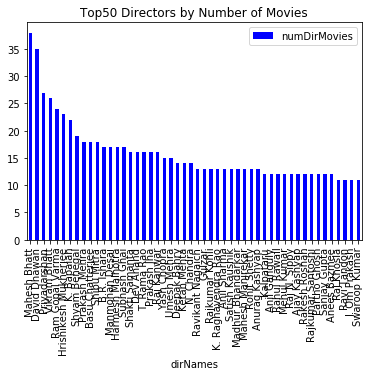

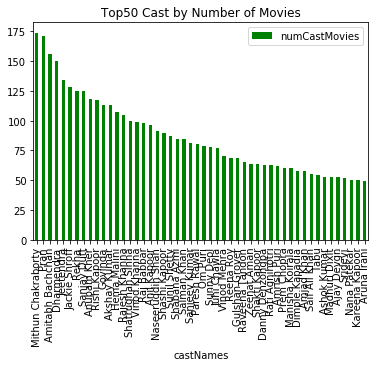

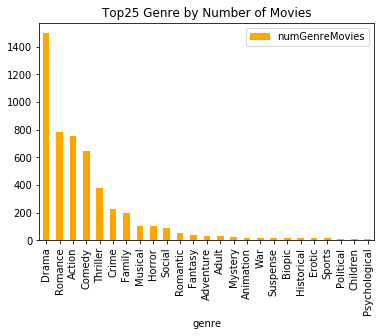

In [15]:
# Plots of Top50s
dirNames = []
numDirMovies = []
for dir in top50Directors:
    dirNames.append(dir[0])
    numDirMovies.append(dir[1])

castNames = []
numCastMovies = []
for cast in top50CastMembers:
    castNames.append(cast[0])
    numCastMovies.append(cast[1])

genre = []    
numGenreMovies = []
for gen in top50Genre:
    genre.append(gen[0])
    numGenreMovies.append(gen[1])
    
lists = [dirNames, numDirMovies, castNames, numCastMovies, genre, numGenreMovies]
movieCntsDF = pd.concat([pd.Series(x) for x in lists], axis=1)
movieCntsDF.columns = ['dirNames','numDirMovies','castNames','numCastMovies','genre','numGenreMovies']

movieCntsDF.plot(kind='bar', x='dirNames', y='numDirMovies', color='blue', title='Top50 Directors by Number of Movies')
movieCntsDF.plot(kind='bar', x='castNames', y='numCastMovies', color='green', title='Top50 Cast by Number of Movies')

movieCnts25DF = movieCntsDF.loc[0:24,('genre', 'numGenreMovies')]
movieCnts25DF.plot(kind='bar', x='genre', y='numGenreMovies', color='orange', title='Top25 Genre by Number of Movies')

For directors and cast members, part of the skewed distribution may be accounted for by the differences in age and career longevity among the various directors and cast. Older directors and cast members have obviously been around longer and have had a greater opportunity to be involved a larger number of movies. While may account for some of the differences, it doesn't completely explain the differences because as we'll see shortly even the top directors and actors seem to all have a peak in their careers which tapers off as time passes.

The same is not necessary true of 'genre'.  While a genre large number of labels have been used through the years, you can see from the above distribution that a 4 of the labels -- drama, romance, action, comedy -- seem to dominate so much that they're likely to appear quite frequently across the entire spread of time from 1970-present day.

Grouping Results into 5 Year Intervals: 1970, 1975, ...

To get a better picture of the longitudinal changes I'm going to first create a new field for both the bollywoodDict and bollyWoodDF called 'movieYears5' whose value indicates into which 5 year interval the corresponding movieYear falls, i.e. the movieYears from 1970-1974 will be assigned to the bin 1970, 1975-1979 to 1975, and so on. 

In [16]:
# Convert 'movieYear' to nearest 5 year period
for ky in list(bollywoodDict.keys()):
    yr = bollywoodDict[ky]['movieYear']
    yr5 = int(np.floor(yr / 5) * 5)
    bollywoodDict[ky]['movieYears5'] = yr5

print("Added new 5 year field -- movieYears5 to bollywoodDict:")
print("")
bollywoodDict[0].keys()
print("")
print("Samples values for first and last movies in dictionary:")
print("")
print(bollywoodDict[0])
print("")
print(bollywoodDict[4709])

Added new 5 year field -- movieYears5 to bollywoodDict:



dict_keys(['_id', 'movieID', 'movieTitle', 'movieYear', 'movieLink', 'movieDirector', 'movieCast', 'movieGenre', 'count', 'numDirectors', 'numCast', 'numGenre', 'movieDirectorList', 'movieCastList', 'movieGenreList', 'movieYears5'])


Samples values for first and last movies in dictionary:

{'_id': 0, 'movieID': '1970-0', 'movieTitle': 'Aag Aur Daag', 'movieYear': 1970, 'movieLink': '/wiki/Aag_Aur_Daag', 'movieDirector': 'A. Salaam', 'movieCast': 'Joy Mukherjee|Madan Puri', 'movieGenre': 'Action', 'count': 1, 'numDirectors': 1.0, 'numCast': 2.0, 'numGenre': 1.0, 'movieDirectorList': ['A. Salaam'], 'movieCastList': ['Joy Mukherjee', 'Madan Puri'], 'movieGenreList': ['Action'], 'movieYears5': 1970}

{'_id': 4709, 'movieID': '2017-42', 'movieTitle': 'Sachin: A Billion Dreams', 'movieYear': 2017, 'movieLink': '/wiki/Sachin:_A_Billion_Dreams', 'movieDirector': 'James Erskine', 'movieCast': 'Sachin Tendulkar', 'movieGenre': 'Biopic', 'count': 1, 'numDirectors': 1.0, 'numCast': 1.0, 'numGenre': 1.0, 'movieDirectorList': ['James Erskine'], 'movieCastList': ['Sachin Tendulkar'], 'movieGenreList': ['Biopic'], 'movieYears5': 2015}


Longitudinal Analysis of the 5 Year Groupings

With the addition of the new field 'movieYears5', we can revisit the count of the number of movies over time. In this instance, however, instead of a year-by-year account we have the counts for the 5 year intervals from 1970 to the present. Again, we see the same pattern as the yearly figures, quite a bit of variablility from one interval to the next but with less noise. Here, the counts before and after 1995 are almost mirror images with peaks occurring 15 years earlier in 1980 and 15 years later in 2010. 

Mean number of movies per 5 year interval: movieYears5    490.8
dtype: float64

Number of movies per 5 year interval:


,movieYears5
movieYears5,
1970.0,412
1975.0,397
1980.0,574
1985.0,472
1990.0,524
1995.0,429
2000.0,523
2005.0,516
2010.0,586


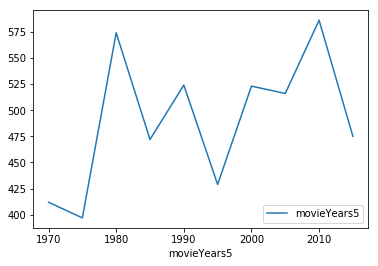

In [17]:
# Convert 'movieYear' to nearest 5 year period
for ky in list(bollywoodDict.keys()):
    yr = bollywoodDict[ky]['movieYear']
    yr5 = int(np.floor(yr / 5) * 5)
    bollywoodDict[ky]['movieYears5'] = yr5
    bollywoodDF.loc[ky, 'movieYears5'] = bollywoodDict[ky]['movieYears5']
    
#for ky in list(bollywoodDict.keys()):
groupByYears5 = bollywoodDF.groupby('movieYears5')['movieYears5'].count()
groupByYears5DF = pd.DataFrame(data=groupByYears5)
print("Mean number of movies per 5 year interval:", groupByYears5DF.mean())
print("")
print("Number of movies per 5 year interval:")
groupByYears5DF
groupByYears5DF.plot(kind='line')

Summarizing 5 year Results in an Additional Dictionary -  'years5Dict'

With the addition of the 5 year intervals 'movieYears5' to the bollywoodDict, we can create a list of the individual directors and cast members that appeared in movies during those years and well as a list of the genre that were applied. 

With these three lists, we can create additional fields using a collection Counter that represent the number of times that each director, cast member, or genre appeared in the given 5 year interval. From this we can also establish the 25 'most common' directors, cast members or genres in these same periods. This is what's done in the following cells. Additionally, the various lists and counts are captured in a new dictionary called 'years5Dict' 

In [18]:
years5Dict = {}
for ky in bollywoodDict.keys():
    years5 = bollywoodDict[ky]['movieYears5']
    # for each 5 year period initialize a dictionary
    if years5 not in years5Dict.keys():
        years5Dict[years5] = {}
        years5Dict[years5]['dirList'] = []
        years5Dict[years5]['castList'] = []
        years5Dict[years5]['genreList'] = []
    years5Dict[years5]['dirList'] = years5Dict[years5]['dirList'] + bollywoodDict[ky]['movieDirectorList']
    years5Dict[years5]['castList'] = years5Dict[years5]['castList'] + bollywoodDict[ky]['movieCastList']      
    years5Dict[years5]['genreList'] = years5Dict[years5]['genreList'] + bollywoodDict[ky]['movieGenreList']    

In [19]:
def createCounter(yDict, entityList,entityCntStr,entityMCStr):
    tempDict = {}
    for ky in yDict.keys(): tempDict[ky] = {}
    for ky in yDict.keys():
        entityCnt = cl.Counter()
        for eName in yDict[ky][entityList]:
            if type(eName) != float:
                entityCnt[eName] += 1
        tempDict[ky][entityCntStr] = entityCnt
        tempDict[ky][entityMCStr] = entityCnt.most_common(25)
    return tempDict

tempDirDict = createCounter(years5Dict, 'dirList', 'directorCnt', 'dirMostCommon25' )
tempCastDict = createCounter(years5Dict, 'castList', 'castMemCnt', 'castMostCommon25' )
tempGenreDict = createCounter(years5Dict, 'genreList', 'genreCnt', 'genreMostCommon25' )

for ky in years5Dict.keys():
    years5Dict[ky]['directorCnt'] = tempDirDict[ky]['directorCnt']
    years5Dict[ky]['dirMostCommon25'] = tempDirDict[ky]['dirMostCommon25']
    years5Dict[ky]['castMemCnt'] = tempCastDict[ky]['castMemCnt']
    years5Dict[ky]['castMostCommon25'] = tempCastDict[ky]['castMostCommon25']
    years5Dict[ky]['genreCnt'] = tempGenreDict[ky]['genreCnt']
    years5Dict[ky]['genreMostCommon25'] = tempGenreDict[ky]['genreMostCommon25']

print(years5Dict.keys())
print("")
print(years5Dict[1970].keys())
print("")

dict_keys([1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015])

dict_keys(['dirList', 'castList', 'genreList', 'directorCnt', 'dirMostCommon25', 'castMemCnt', 'castMostCommon25', 'genreCnt', 'genreMostCommon25'])



The counter lists in years5Dict provide the means to examine, as we did with the movie counts per 5 year interval, the shifts in the number of directors, cast members and genre across these same intervals.  A summary of these counter lists across time is provide in the 'totEntsDF' dataframe. The frame include the counts for (1) the total number entities (i.e. directors, cast and genre), (2) the total number of unique entities, and (3) the ratio of the total number to the unique number. What the ratios represent is basically the mean number of times that an individual entity appeared in a given 5 year time interval. For instance, there were 213 directors who directed movies in the 5 year interval from 1970-74. These 213 directors directed a total of 391 films. The ratio of the latter to the former is 1.84 which indicates that on average they directed under 2 films a piece. Of course, we know that some only produced 1 film and others more. Similarly, for this same time interval, each individual cast members appeared on average in a little under 5 movies and each individual genre label or type was applied on average to approximately 24 movies.

In [20]:
def entitiesPerYr(yDict,entityCnt):
    entCntList = []
    for ky in yDict.keys():
        totEnt = 0
        for dir, cnt in years5Dict[ky][entityCnt].items():
            totEnt += cnt
        entCntList = entCntList + [totEnt]
    return entCntList

def totUnique(yDict,entityCnt):
    totUniqEntList = []
    for ky in yDict.keys():
        uniqEntCnt = len(years5Dict[ky][entityCnt])
        totUniqEntList = totUniqEntList + [uniqEntCnt]
    return totUniqEntList

def diffTotToUniq(entCntList,totUniqEntList,rDig):
    diffList = []
    for i in range(len(entCntList)):
        diffTtoU = round((entCntList[i] - totUniqEntList[i]),rDig)
        diffList = diffList + [diffTtoU]
    return diffList
    
    
def ratioTotToUniq(entCntList,totUniqEntList,rDig):
    ratioList = []
    for i in range(len(entCntList)):
        ratTtoU = round((entCntList[i]/totUniqEntList[i]),rDig)
        ratioList = ratioList + [ratTtoU]
    return ratioList
        
totDir = entitiesPerYr(years5Dict,'directorCnt')
totUniqDir = totUnique(years5Dict,'directorCnt')
diffDir = diffTotToUniq(totDir,totUniqDir,2)
ratioDir = ratioTotToUniq(totDir,totUniqDir,2)
totCast = entitiesPerYr(years5Dict,'castMemCnt')
totUniqCast = totUnique(years5Dict,'castMemCnt')
diffCast = diffTotToUniq(totCast,totUniqCast,2)
ratioCast = ratioTotToUniq(totCast,totUniqCast,2)
totGenre = entitiesPerYr(years5Dict,'genreCnt')
totUniqGenre = totUnique(years5Dict,'genreCnt')
diffGenre = diffTotToUniq(totGenre,totUniqGenre,2)
ratioGenre = ratioTotToUniq(totGenre,totUniqGenre,2)


Summary of dataframe and plots

,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015
totDir,391.00,172.00,492.00,367.00,482.00,400.00,344.00,393.00,591.00,475.00
totUniqDir,213.00,126.00,295.00,257.00,315.00,262.00,244.00,290.00,470.00,392.00
diffDir,178.00,46.00,197.00,110.00,167.00,138.00,100.00,103.00,121.00,83.00
ratioDir,1.84,1.37,1.67,1.43,1.53,1.53,1.41,1.36,1.26,1.21


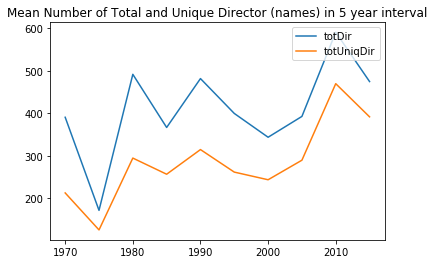

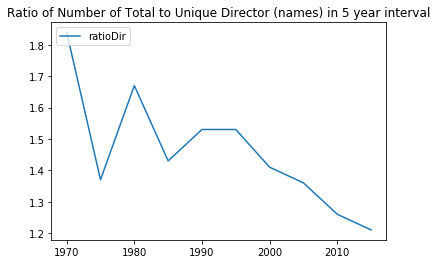

In [22]:
colList = list(years5Dict.keys())
indxList = ['totDir','totUniqDir','diffDir','ratioDir']
totEnts = [totDir, totUniqDir, diffDir, ratioDir]
totEntsDF = pd.DataFrame(data=totEnts, columns=colList, index = indxList)
totEntsDF 

p1Title = "Mean Number of Total and Unique Director (names) in 5 year interval"
ax1 = totEntsDF.loc[['totDir','totUniqDir'],:].transpose().plot(kind='line',title=p1Title)
p2Title = "Ratio of Number of Total to Unique Director (names) in 5 year interval"
ax2 = totEntsDF.loc[['ratioDir'],:].transpose().plot(kind='line',title=p2Title)
ax1.legend(loc=1)
ax2.legend(loc=2)

plt.show()

,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015
totCast,1028.00,903.00,1693.00,1291.00,1608.00,1369.00,1462.00,2124.00,2449.00,1885.00
totUniqCast,212.00,228.00,433.00,402.00,475.00,412.00,491.00,653.00,1205.00,1086.00
diffCast,816.00,675.00,1260.00,889.00,1133.00,957.00,971.00,1471.00,1244.00,799.00
ratioCast,4.85,3.96,3.91,3.21,3.39,3.32,2.98,3.25,2.03,1.74


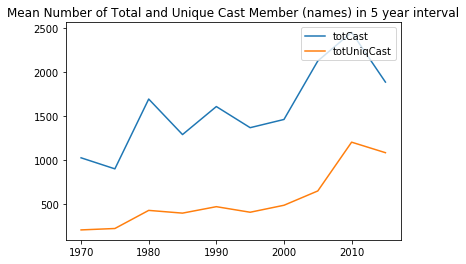

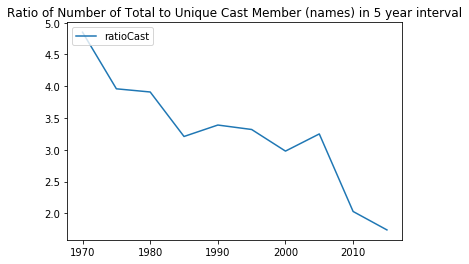

In [23]:
colList = list(years5Dict.keys())
indxList = ['totCast','totUniqCast','diffCast','ratioCast']
totEnts = [totCast, totUniqCast, diffCast, ratioCast]
totEntsDF = pd.DataFrame(data=totEnts, columns=colList, index = indxList)
totEntsDF 

p1Title = "Mean Number of Total and Unique Cast Member (names) in 5 year interval"
ax1 = totEntsDF.loc[['totCast','totUniqCast'],:].transpose().plot(kind='line',title=p1Title)
p2Title = "Ratio of Number of Total to Unique Cast Member (names) in 5 year interval"
ax2 = totEntsDF.loc[['ratioCast'],:].transpose().plot(kind='line',title=p2Title)
ax1.legend(loc=1)
ax2.legend(loc=2)

plt.show()

,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015
totGenre,383.00,140.00,631.00,427.00,643.00,498.0,573.00,587.00,652.00,682.00
totUniqGenre,16.00,15.00,20.00,21.00,19.00,20.0,22.00,36.00,60.00,52.00
diffGenre,367.00,125.00,611.00,406.00,624.00,478.0,551.00,551.00,592.00,630.00
ratioGenre,23.94,9.33,31.55,20.33,33.84,24.9,26.05,16.31,10.87,13.12


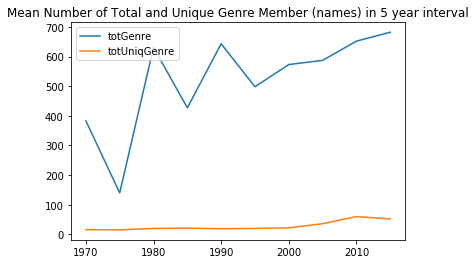

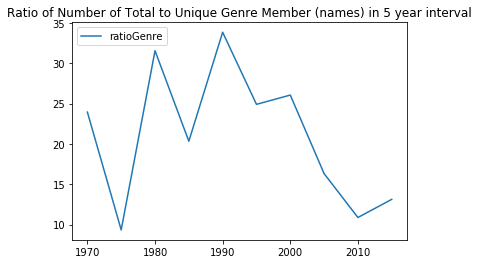

In [24]:
colList = list(years5Dict.keys())
indxList = ['totGenre','totUniqGenre','diffGenre','ratioGenre']
totEnts = [totGenre, totUniqGenre, diffGenre, ratioGenre]
totEntsDF = pd.DataFrame(data=totEnts, columns=colList, index = indxList)
totEntsDF 

p1Title = "Mean Number of Total and Unique Genre Member (names) in 5 year interval"
ax1 = totEntsDF.loc[['totGenre','totUniqGenre'],:].transpose().plot(kind='line',title=p1Title)
p2Title = "Ratio of Number of Total to Unique Genre Member (names) in 5 year interval"
ax2 = totEntsDF.loc[['ratioGenre'],:].transpose().plot(kind='line',title=p2Title)
ax1.legend(loc=2)
ax2.legend(loc=2)

plt.show()

Explanation of Jaccard index and summary of results

In [25]:
# Jaccard index of similarities in sets of most common directors, cast members and genre 5 year time periods
# indicating the ratio of the length of the intersection of the 2 sets to the union of the two sets.
# If the 2 sets have the no members in common, then the ratio is 0; if the sets have the same member,
# then the ratio is 1.0. A ratio of .5 says that approximately 50% of the members are in common.

# Alternative way to measure change is lists is to
# calculate topic similarity using a bag of words and something like NMF

def compute_jaccard_index(set_1, set_2):
    return len(set_1.intersection(set_2)) / float(len(set_1.union(set_2))) 

def jaccMatrix(years5Dict, rankRange, mostCommList):
    yrList = list(years5Dict.keys())
    listLen = len(yrList)
    rankRange = 15

    jaccMatrix = np.zeros((listLen, listLen))
    for i in range(listLen):
            jaccMatrix[i,i] = 1.0

    arrMostCommon = []
    for yrIndx in yrList:
        listEntity = []
        mcList = years5Dict[yrIndx][mostCommList]
        listEntity = [val.lower() for val,cnt in mcList]
        arrMostCommon.append(listEntity)

    for i in range(0,listLen):
        seti = set(arrMostCommon[i])
        for j in range(i+1,listLen):
            setj = set(arrMostCommon[j])
            jInd = compute_jaccard_index(seti, setj)
            jaccMatrix[i,j] = round(jInd, 2)
    return jaccMatrix

dirJaccMat = jaccMatrix(years5Dict,25,'dirMostCommon25')
castJaccMat = jaccMatrix(years5Dict,25,'castMostCommon25')
genreJaccMat = jaccMatrix(years5Dict,15,'genreMostCommon25')

Heatmap for Jaccard Index among Top 25 directors lists for each 5 year interval


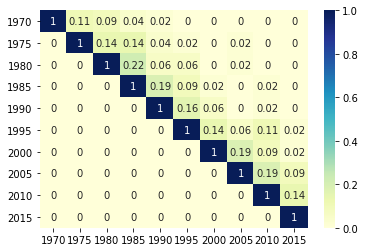

In [26]:
import seaborn as sns
%matplotlib inline

yrList = list(years5Dict.keys())

print("Heatmap for Jaccard Index among Top 25 directors lists for each 5 year interval")
dirJaccDF = pd.DataFrame(data=dirJaccMat,columns=yrList,index=yrList)
sns.heatmap(dirJaccDF, annot=True, cmap="YlGnBu")

Heatmap for Jaccard Index among Top 25 cast members lists for each 5 year interval


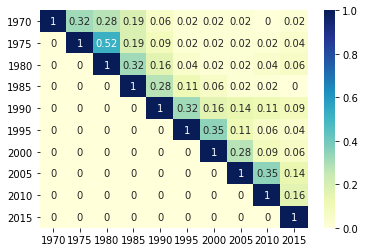

In [27]:
print("Heatmap for Jaccard Index among Top 25 cast members lists for each 5 year interval")
castJaccDF = pd.DataFrame(data=castJaccMat,columns=yrList,index=yrList)
sns.heatmap(castJaccDF, annot=True, cmap="YlGnBu")

Heatmap for Jaccard Index among Top 25 genre lists for each 5 year interval


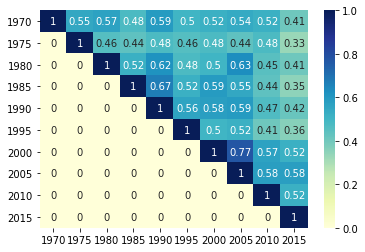

In [28]:
print("Heatmap for Jaccard Index among Top 25 genre lists for each 5 year interval")
genreJaccDF = pd.DataFrame(data=genreJaccMat,columns=yrList,index=yrList)
sns.heatmap(genreJaccDF, annot=True, cmap="YlGnBu")

Explanation of data and charts for top5 entities and summary of results

In [29]:
def arrTop(yearsDict,numYears,numEntities,entityCnt, topList):
    top = [i for i,j in topList[0:numEntities]]
    yrList = list(years5Dict.keys())
    arrTop = np.zeros((numEntities,numYears))
    for i in range(numEntities):
        totMovies = 0
        for j in range(len(yrList)):
            numMovies = years5Dict[yrList[j]][entityCnt][top[i]]
            arrTop[i,j] = numMovies
            
    top = [i for i,j in topList[0:numEntities]]
    topDF = pd.DataFrame(data=arrTop,columns=yrList,index=top)
    topDF                                
    return topDF

dirTopArray = arrTop(years5Dict, 10, 5, 'directorCnt', top50Directors)
dirTopArray
castTopArray = arrTop(years5Dict, 10, 5, 'castMemCnt', top50CastMembers)
castTopArray
genreTopArray = arrTop(years5Dict, 10, 6, 'genreCnt', top50Genre)
genreTopArray

,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015
Mahesh Bhatt,1.0,1.0,3.0,7.0,15.0,10.0,0.0,0.0,0.0,1.0
David Dhawan,0.0,0.0,0.0,0.0,9.0,12.0,8.0,2.0,3.0,1.0
Priyadarshan,0.0,0.0,0.0,0.0,2.0,5.0,5.0,9.0,6.0,0.0
Vikram Bhatt,0.0,0.0,0.0,0.0,2.0,4.0,4.0,7.0,5.0,4.0
Ram Gopal Varma,0.0,0.0,0.0,0.0,1.0,6.0,3.0,8.0,4.0,2.0


,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015
Mithun Chakraborty,0.0,3.0,38.0,36.0,31.0,39.0,4.0,14.0,9.0,0.0
Pran,49.0,26.0,43.0,25.0,15.0,12.0,1.0,0.0,0.0,0.0
Amitabh Bachchan,20.0,28.0,22.0,10.0,8.0,7.0,18.0,26.0,9.0,8.0
Dharmendra,28.0,22.0,26.0,22.0,21.0,16.0,5.0,4.0,4.0,2.0
Jeetendra,22.0,19.0,41.0,18.0,24.0,9.0,1.0,0.0,0.0,0.0


,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015
Drama,223.0,55.0,203.0,114.0,172.0,129.0,167.0,142.0,117.0,176.0
Romance,69.0,33.0,73.0,45.0,117.0,85.0,119.0,78.0,93.0,69.0
Action,37.0,20.0,106.0,90.0,152.0,120.0,61.0,38.0,68.0,64.0
Comedy,17.0,9.0,49.0,28.0,42.0,50.0,63.0,121.0,139.0,125.0
Thriller,15.0,2.0,28.0,22.0,25.0,20.0,59.0,66.0,56.0,83.0
Crime,4.0,1.0,36.0,37.0,62.0,30.0,7.0,10.0,16.0,21.0


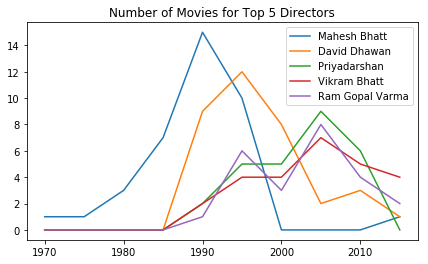

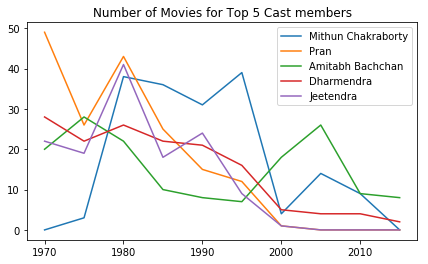

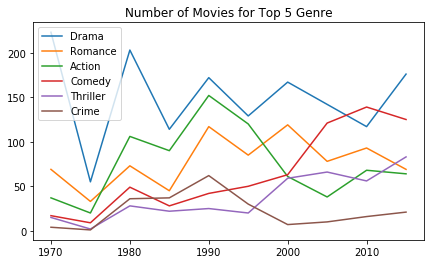

In [30]:
dirTopArray.transpose().plot(kind='line',legend=True, title="Number of Movies for Top 5 Directors", figsize=(7,4))
castTopArray.transpose().plot(kind='line',legend=True, title="Number of Movies for Top 5 Cast members", figsize=(7,4))
genreTopArray.transpose().plot(kind='line',legend=True, title="Number of Movies for Top 5 Genre", figsize=(7,4))

 Analyses left: 1. genre by director, cast members; 2. genre by time by director; 3. genre by time by case; 